In [119]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot as hvp
import datetime
import altair as alt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
import plotly.express as px

### DataFrame for Drawdown

In [85]:
# Creating a range of dates
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2023, 12, 31)
date_range = pd.date_range(start_date, end_date, freq='D')
# Dates df
dates_df = pd.DataFrame(date_range, columns=['Date'])
#print(dates_df.head(1825))

# Creating a range of random "prices"
portfolio_df = pd.DataFrame(
    {
    "fake1": np.random.uniform(100, -50, 100),
    "fake2": np.random.uniform(100, -50, 100),
    "fake3": np.random.uniform(100, -50, 100)
    }
    )
f1_portfolio_df = portfolio_df["fake1"].to_frame()

# Concatinating and finalizing test data
returns = pd.concat([dates_df, portfolio_df], join = "inner", axis = 1)
returns.set_index('Date', inplace = True)
returns = pd.DataFrame(returns)
returns = returns.reset_index().rename(columns={'Date': 'date'})
returns.set_index('date', inplace = True)

### Data Frame for Portfolio Pie Chart

In [133]:
# Creating DataFrame for Bitcoin
btc_portfolio_df = pd.DataFrame({
    'stock': ['BTC:USD'],
    'position_size': np.random.uniform(10, 150, size = 1)
})

# Creating DataFrame for Stocks
stock_portfolio_df = pd.DataFrame({
    'stock': ['AMC', 'VSCO', 'TSLA', 'GOOGL'],
    'position_size': np.random.uniform(round(1000), 10000, 4)  # for 5 stocks
})

# Combining DataFrames
size_portfolio_df = pd.concat([btc_portfolio_df, stock_portfolio_df], axis = 0).reset_index(drop = True)

# Renaming stock column to securities
size_portfolio_df = size_portfolio_df.rename(columns = {'stock' : 'securities'})

### Portfolio Pie Chart Function

In [178]:
# Defining Portfolio pie chart function
def portfolio_piechart (holdings, size):
    '''
    holdings: str: Column name
    size: str: Column Name
    '''
    selection = alt.selection_single()
    pie_chart = alt.Chart(size_portfolio_df).mark_arc(innerRadius=50).encode(
        theta = alt.Theta(field = 'position_size', type = 'quantitative'),
        color = alt.Color(field = 'securities', type = 'nominal'),
        tooltip=['securities', 'position_size']
    )
    return pie_chart

### Portfolio Pie Chart

In [135]:
one = size_portfolio_df['securities']
two = size_portfolio_df['position_size']
user_in_holdings = portfolio_piechart(one, two)
user_in_holdings

c:\Users\Gino\AppData\Local\Programs\Python\Python39\lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning:

'selection_single' is deprecated.  Use 'selection_point'



alt.Chart(...)

In [89]:
initial_investment = 10000

### Cumulative Returns

In [90]:
def cumulative_returns(df):
    return (1 + df).cumprod()

In [91]:
user_cr = cumulative_returns(portfolio_df)
user_cr

,fake1,fake2,fake3
0,87.53,96.80,16.02
1,-184.63,1065.13,1358.50
2,-11396.58,40534.63,96377.17
3,-523718.88,2293940.55,6836385.65
4,9798961.03,-44156605.71,-168738253.87
...,...,...,...
95,-9518900413871881595774291171527515748753888394...,-2390893145988428193846601880828389051302124892...,21998096745622218812159958019716774264583288680...
96,-5264695441571634731834094946471777647848251640...,-2025503910048354302550410560262633185997132496...,79182757863742384903799784536685070628786475045...
97,-3175370251810505518383460355402917585596658494...,-2825492200563282864364738249778336954391801721...,42261704308131164524368776800899535195308506587...
98,48871598037999867441161165352756782975710881712...,-4118786334810994629799570814747287844536504930...,22257833591908679707181965549013500914760848616...


### Correlation

In [92]:
returns_cor = returns.corr()
returns_cor

,fake1,fake2,fake3
fake1,1.00,0.03,0.02
fake2,0.03,1.00,0.12
fake3,0.02,0.12,1.00


### Correlation Heatmap Function Interactive

In [122]:
def corr_plot(df):
    '''
    df: correlation dataframe
    '''
    # px plotly package
    fig = px.imshow(returns_cor, text_auto=True, aspect="auto", 
                    color_continuous_scale='RdBu_r', zmin=-1, zmax=1)
    fig.update_layout(width = 750, height = 600, title='Correlation Plot')

### Correlation Heat map Interactive

In [123]:
corr_plot(returns_cor)

### Scatter plot for correlation; non-interactive

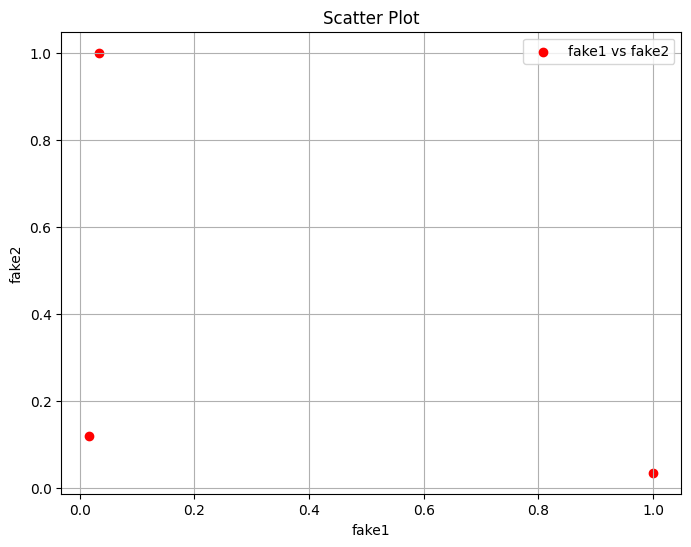

In [151]:
def plot_scatter(df, x, y, color):
    '''
    df = Corr df
    x: str: Column in a dataframe
    y: str: Column in a dataframe
    color: str: Color
    '''
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x], df[y], label=f'{x} vs {y}', color=color)
    
    # Customize the plot
    plt.title('Scatter Plot')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.grid(True)
    
plot_scatter(returns_cor, 'fake1', 'fake2', color = 'red')

### Scatter plot for correlation; Interactive

In [161]:
def interactive_scatter(df):
    '''
    df: correlation dataframe
    '''
    def plot(df, x_axis, y_axis, color):
        '''
        df: correlation dataframe
        x_axis: str: variable 1; column 
        y_axis: str: variable 2; column 
        color: var: determined via user input
        '''
        plt.figure(figsize=(8, 6))
        plt.scatter(df[x_axis], df[y_axis], label=f'{x_axis} vs {y_axis}', color=color)
        plt.title('Scatter Plot')
        plt.xlabel(x_axis)
        plt.ylabel(y_axis)
        plt.legend()
        plt.grid(True)
        plt.show()

    interact(plot, 
             x_axis = widgets.Dropdown(options = df.columns.tolist(), value = 'fake1', description = 'X-axis'),
             y_axis = widgets.Dropdown(options = df.columns.tolist(), value = 'fake2', description = 'Y-axis'),
             color = widgets.ColorPicker(value = 'blue', description='Color')
            )


### Correlation scatter plot execution

In [158]:
interactive_scatter(returns_cor)

interactive(children=(Dropdown(description='X-axis', options=('fake1', 'fake2', 'fake3'), value='fake1'), Drop…

### Covariance

In [97]:
def covariance(df, ticker, market):
    return df[ticker].cov(df[market])

In [98]:
user_covariance = covariance(portfolio_df, 'fake2', 'fake3')
user_covariance

241.8108808656938

### Variance

In [99]:
def variance(df, market):
    return df[market].var()

In [100]:
user_variance = variance(portfolio_df, 'fake3')
user_variance

2011.9428760221542

### Drawdown

In [101]:
def drawdown(df, tickers):
    Roll_Max = df[tickers].cummax()
    Daily_Drawdown = df[tickers]/Roll_Max - 1.0
    Max_Daily_Drawdown = Daily_Drawdown.cummin() * 100

In [102]:
user_drawdown = drawdown(portfolio_df, 'fake1')
user_drawdown

### Drawdown Chart Function

In [103]:
def drawdown_chart(df, date, quant):
    '''
    df: dataframe
    date: str: should be a date column name
    quant: str: should be a quantitative data type
    '''
    chart = alt.Chart(df.reset_index()).mark_bar().encode(
        x = date + ':T',  # T specifies temporal data type for x-axis
        y = quant + ':Q',  # Q specifies a quantitative data type for y-axis
        color = alt.condition(
            getattr(alt.datum, quant) > 0,
            alt.value("Green"),  # The positive color
            alt.value("red")
    ), tooltip= [date + ':T', quant + ':Q']
    ).properties(width=800)
    chart = chart.interactive()
    return chart

In [104]:
user_drawdown = drawdown_chart(returns, 'date', 'fake1')
user_drawdown

alt.Chart(...)

In [105]:
def tracking_error(df, tickers, market):
    track_error = np.sqrt(sum([i**2 for i in df[tickers] - df[market]]))
    return track_error

In [106]:
user_tracking_error = tracking_error(portfolio_df, 'fake2', 'fake3')
user_tracking_error

601.0947008619255

### Beta

In [107]:
def beta(covariance, variance):
    chart_beta = covariance / variance
    chart_beta = chart_beta
    return chart_beta

In [108]:
user_beta = beta(user_covariance, user_variance)
user_beta

0.12018774675341783

### Sharpe Ratio

In [109]:
def sharpe_ratio(df):
    sharpe = (df.mean()*252) / (df.std() * np.sqrt(252))
    return sharpe

In [110]:
user_sharpe_ratio = sharpe_ratio(portfolio_df)
user_sharpe_ratio

fake1    8.94
fake2    8.53
fake3   10.48
dtype: float64

### Return on Investment Function

In [111]:
def return_on_investment(investment, returns):
    cumulative_profit = investment * returns
    return_oi = (cumulative_profit - investment) / investment
    return(return_oi)

### ROI 

In [177]:
user_roi = return_on_investment(initial_investment, user_cr)
user_roi

,fake1,fake2,fake3
0,86.53,95.80,15.02
1,-185.63,1064.13,1357.50
2,-11397.58,40533.63,96376.17
3,-523719.88,2293939.55,6836384.65
4,9798960.03,-44156606.71,-168738254.87
...,...,...,...
95,-9518900413871881595774291171527515748753888394...,-2390893145988428193846601880828389051302124892...,21998096745622221651373724799431190472879413242...
96,-5264695441571634731834094946471777647848251640...,-2025503910048354302550410560262633185997132496...,79182757863742384903799784536685070628786475045...
97,-3175370251810505518383460355402917585596658494...,-2825492200563282864364738249778336954391801721...,42261704308131164524368776800899535195308506587...
98,48871598037999867441161165352756782975710881712...,-4118786334810994629799570814747287844536504930...,22257833591908679707181965549013500914760848616...


### ROI Chart

In [186]:
def roi_chart(df):
    '''
    df: var: ROI DF
    '''
    def roi_plot(df, initial_investment=10000, width=400):
        '''
        df: var: ROI DF
        initial_investment: int
        width: int
        '''
        # Melt the DataFrame to convert it into a long format
        df_melted = df.reset_index().melt(id_vars = 'index', var_name = 'Asset', value_name = 'ROI')

        # Bar chart
        bars = alt.Chart(df_melted).mark_bar().encode(
            x = alt.X('Asset:N', title = "Asset"),
            y = alt.Y('ROI:Q', title = "Return on Investment"),
            color = 'Asset:N',  # Adding color encoding for better distinction
            tooltip = ['Asset', 'ROI']
        ).properties(width=width)

        # Initial investment line chart
        initial_investment_df = pd.DataFrame({
            'Asset': df.columns.tolist(),
            'Initial Investment': [initial_investment] * len(df.columns)
        })
        line = alt.Chart(initial_investment_df).mark_rule(color = 'firebrick').encode(
            y = 'Initial Investment:Q'
        )

        # Combine charts
        return bars + line

    return roi_plot(df)

In [185]:
chart = roi_chart(user_roi)
chart

alt.LayerChart(...)